In [2]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import fsolve

In [3]:
mu = -0.92

In [4]:
def cos_fun(num):
    return 1.5 * np.cos(num)

In [5]:
def normfun(x, mu, sigma):
    pdf = np.exp(-((x - mu)**2)/(2*sigma**2)) / (sigma * np.sqrt(2*np.pi))
    return pdf

In [29]:
def init(x):
    #return np.cosh(x-np.pi) * 1.5 * normfun(x, 0, 1)
    #return 1.5 * normfun(x, 0.5, np.pi)
    return 1.5 * normfun(x, np.pi, 0.5)# * 0.001 * np.cosh(x-np.pi)

In [15]:
def get_N(soliton, step):
    length = int(2 * np.pi / step)
    N_ = np.zeros(length)
    for i in range(length):
        N_ = soliton * soliton.T
    return sum(N_)

## 非线性薛定谔方程求孤子

\begin{equation}
-\frac{1}{2}\frac{\partial^2 {\phi}}{\partial {x^2}} + V(x)\phi(x) + \left|\phi(x)\right|^2\phi(x) = \mu\phi(x)
\end{equation}
# $\mu$ 为常数，等式相等即
\begin{equation}
-\frac{1}{2}\frac{\partial^2 {\phi}}{\partial {x^2}} + V(x)\phi(x) + \left|\phi(x)\right|^2\phi(x) - \mu\phi(x) = 0
\end{equation}

---
# 有限差分法，离散二阶导
\begin{equation}
f'' = \frac{f(x+\Delta x) + f(x-\Delta x)-2f(x)}{(\Delta x)^2}
\end{equation}

In [14]:
np.zeros(3)

array([0., 0., 0.])

In [36]:
#V = cos(x)
def fun(x, step=32*np.pi/2048):
    F = np.zeros(len(x))
    # 第0
    F[0] = - 0.5 * \
           ((x[1] - 2 * x[0]) / step ** 2) + \
           cos_fun(x[0]) * x[0] + \
           np.abs(x[0]) ** 2 * x[0] - mu * x[0]
    # 最后一项
    F[-1] = - 0.5 * \
           ((x[-2] - 2 * x[-1]) / step ** 2) + \
           cos_fun(x[-1]) * x[-1] + \
           np.abs(x[-1]) ** 2 * x[-1] - mu * x[-1]
    F[0] = 0
    F[-1] = 0
    # 第1到第N-1
    for i in range(1, len(F)-1):
        F[i] = - 0.5 * \
           ((x[i+1] + x[i-1] - 2 * x[i]) / step ** 2) + \
           cos_fun(x[i]) * x[i] + \
           np.abs(x[i]) ** 2 * x[i] - mu * x[i]
    return F

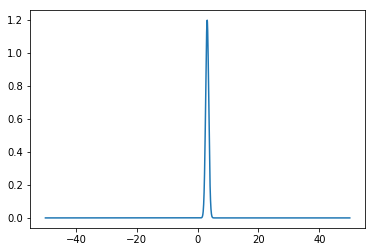

In [37]:
field = np.arange(-50, 50, 32*np.pi/2048)
xx = init(field)
#xx = np.random.normal(0, 1, len(field))
rslt = fsolve(fun, xx)
plt.plot(field, rslt)
plt.show()

In [38]:
get_N(rslt, 32*np.pi/2048)

25.860545586025015

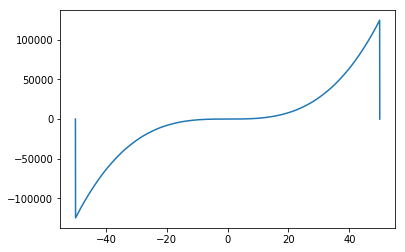

In [39]:
z = fun(field)
plt.plot(field, z)